<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 2</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline: Dec 1, 23:59</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

In this assignment, we want to investigate potential network-structures among the Eurovision Song Contest.

The Eurovision Song Contest is a yearly song contest between european countries. 
Each country can send one representative, performing a music act. 
The winner is determined by a voting system, where a countries inhabitants can vote for *other* countries musicians. 
Based on the number of calls from a certain country to a certain country, points (ranging between 0 and 12) are awarded.

These final points determine the winner of the current year.

<h1>Part 1 - Scrape Eurovision Data from Wikipedia</h1>


<h3>Task 1 - Scrape the years 2010 - 2013 using Beautiful Soup</h3>

In this task, you are supposed to scrape the results from the Eurovision Song Contest for the following years: [2010](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2010), [2011](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2011), [2012](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2012), [2013](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2013). We selected these years, because for them the html-code is (mostly) of the same structure. This way, you can reuse your code. 

- We are interested in the assigned points in the final, which can be found in the table named something like *'Detailed voting results of the final'*. (be careful, this name might be slightly different for one or more of the years. Please write your code to match all options)
- Try to write the code for scraping in a *convenient way* (meaning try not to copy and paste stuff for each year...)


***Important***: We want you to scrape the resulting tables by using Beautiful Soup and html-tags and html-attributes. Please **do not use** the `pd.read_html()` function.


***a) Investigate the underlying html structure of the wikipedia pages. Where can you find the table of interest? How could you filter for it?***

Access and request the wikipedia page. Deal with the response in a suitable way and filter for the html-code, reffering to our table of interest.

*Hint:* One way to select the desired table is to use the tables caption and the `.parent` function.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import pycountry as pc
from statistics import median,mean
import numpy as np


In [2]:
# Solution:
# Requesting the tables
## List for the years to be requested
years=["2010","2011","2012","2013"]
## A base url for the pages
base_url="https://en.wikipedia.org/wiki/Eurovision_Song_Contest_"

## Empty html dictionary
html_years={}
##Empty table dictionary
table_years={}

## Requesting the html from the four pages
for year in years:
    response=requests.get(base_url+year)
    html_years[f"{year}_html"]= BeautifulSoup(response.content, "html.parser")
    ## To deal with the varying caption of the 2013 table, I modify the .find method
    table_years[f"{year}_table"]= html_years[f"{year}_html"].find(string=lambda text: text in ["Detailed voting results of the final", "Final voting results"]).parent.parent


table_years

{'2010_table': <table class="wikitable plainrowheaders" style="text-align:center; font-size:85%;">
 <caption>Detailed voting results of the final<sup class="reference" id="cite_ref-85"><a href="#cite_note-85"><span class="cite-bracket">[</span>81<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-86"><a href="#cite_note-86"><span class="cite-bracket">[</span>82<span class="cite-bracket">]</span></a></sup>
 </caption>
 <tbody><tr>
 <th colspan="2">
 </th>
 <th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606" rel="mw-deduplicated-inline-style"/>Total score</div>
 </th>
 <th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606" rel="mw-deduplicated-inline-style"/>Romania</div>
 </th>
 <th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606

***b) Scrape the content of the table***

Once you restricted the response to the code of the table, start filtering out it's content. 

*Hint:* It might make sense to scrape the table using single lists/vectors for certain information and later recombine these into a data frame of the right format. 

In [3]:
# Solution:
# Scrape table for one year (2010)
## Scraping the judging countries (i.e. the column names)
judging = [i.get_text(strip=True) for i in table_years["2010_table"].find_all("th", class_="nowrap ts-vertical-header is-normal")]
## Scraping the contestants (i.e. the row names)
contestants = [i.get_text(strip=True) for i in table_years["2010_table"].find_all(attrs={"scope": "row"})]
## Scraping the vote ratings, which I store in an iterator object for later use
votes= [i.get_text(strip=True) for i in table_years["2010_table"].find_all("td")]
votes_iter=iter(votes)

## Creating a dictonary where each contestant has a key and the corresponding values are subdictionaries of country: rating that the contestant received from every judging country. To initialize all ratings are set to 0.
results={i:{j:0 for j in judging} for i in contestants}

## Iterating over the dictionary/-ies and filling values from the iteration object the ratings were stored in earlier
for contestant, contestant_dict in results.items():
    for judge in contestant_dict.keys():
        contestant_dict[judge]=next(votes_iter)

## Transforming the dictonary into a pandas Dataframe where empty strings (i.e. no ratings) are replaced with zero
ESC_2010=pd.DataFrame.from_dict(results, orient="index")
ESC_2010.replace("","0", inplace=True)

***c) Reuse your code conveniently to scrape not only one year, but the four years (2010 - 2013) into single data frames.***

If you'd like to, you can additionally export the data frames as separate csv-files.

In [4]:
# Solution:
## Basically the exact same process but as an iteration over the table_years-dictionary
for index,table in enumerate(table_years.keys()):

    judging = [i.get_text(strip=True) for i in table_years[table].find_all("th", class_="nowrap ts-vertical-header is-normal")]
    contestants = [i.get_text(strip=True) for i in table_years[table].find_all(attrs={"scope": "row"})]
    votes= [i.get_text(strip=True) for i in table_years[table].find_all("td")]
    votes_iter=iter(votes)

    results={i:{j:0 for j in judging} for i in contestants}

    for contestant, contestant_dict in results.items():
        for judge in contestant_dict.keys():
            contestant_dict[judge]=next(votes_iter)

    ESC=pd.DataFrame.from_dict(results, orient="index")
    ESC.replace("","0", inplace=True)

    ## An additional step that makes sure all the rating-strings are converted to integer-ratings
    for col in ESC.columns:
        ESC[col]=ESC[col].astype(int)
    
    ## The pandas Dataframe of the current iteration is assigned to the respective year. This is done by conditioning on the current index of the dictonary we iterate over.
    if index==0:
        ESC_2010=ESC.copy()
    elif index==1:
        ESC_2011=ESC.copy()
    elif index==2:
        ESC_2012=ESC.copy()
    elif index==3:
        ESC_2013=ESC.copy()

<h3>Task 2 - Scrape information on each years aritsts using the 'read_html()' function.</h3>

Now, you may use `pd.read_html()` to retreive the tables containing information on each countries artist, their song etc. These tables are called "Participants of the Eurovision Song Contest 20xx"

Store them in separate data frames and make sure to modify them into suitable data types and format.

In [5]:
# Solution:
## Initialize empty participants dictionary
participants={}
## Again, iterating over the year-list and appending the year to the base url and table caption but now with the read_html function.
for year in years:
    participants[year] = pd.read_html(f'https://en.wikipedia.org/wiki/Eurovision_Song_Contest_{year}', match = f"Participants of the Eurovision Song Contest {year}")[0]
    ## Ensuring the scraped data is correctly stored as strings
    for col in participants[year].columns:
        participants[year][col]=participants[year][col].astype(str)


# There is a problem in the songwriter column of all four dataframes. 
# Because in the html-table songwriter names are stored in hlists, last name of songwriter 1 and first names of songwriter 2 are not properly separated by the read_html-function.
# However, I noticed that first and last names are correctly separted. 
# To solve this problem, I defined a function that adds a comma and a space before title case letters that do not have a space before them already. 
# This solution is not perfect. Nevertheless, it takes proper care of most cases and as we do not re-use the data in this column I think it is justified.


def sw_spacer(text): #sw_spacer is a function that takes a text string

    """
    A function that receives a string of first and last names and adds a comma and space before title case letters if they do not have a space before them already (and are not the first letter of the string).

    Input:
    -------
        - text: string
            A string with first and last names (of songwriters). Last name of songwriter 1 and first name of songwriter 2 may not be properly seperated.
    
    Method:
    -------
        An empty auxillary list is created that we use to store iterations over the string in. 
        If in one of these iterations it is found that the letter is not the first element/letter, if its an upper letter, and if there is no space before it, a comma-space is appended to the list before the letter itself.
        After the string-iteration is done and all string-elements are appended to the list, the list is rejoined into a string and returned.
    
    Output:
    -------
        - result: string
    """

    ## Creating an empty auxillary list
    aux_list = []
    ## Iterating over every letter of the string    
    for i in range(len(text)): 
        ## Checking if the letter is not the first element/letter, if its an upper letter, and if there is no space before it.
        if i > 0 and text[i].isupper() and not text[i - 1].isspace(): 
            ## If all of the three conditions above are fulfilled add ", " to the auxillary list (in front of the current element/letter).
            aux_list.append(', ') 
        ## Append the element/letter to the auxillary list
        aux_list.append(text[i]) 
    ## Re-joining the auxillary list to a string that is returned
    return ''.join(aux_list) 

## Applying the sw_spacer function on strings of the Songwriter(s)-column in all four dataframes
for year in participants.values():
    year["Songwriter(s)"]=year["Songwriter(s)"].apply(sw_spacer)


***

<h1>Part 2 - Get data from an API</h1>



To extend our analysis, we would now like you to retreive data from the Wikipedia API.

For every artist competing in one year (you can choose one year between 2010-2013 yourself), we want to get the date, their wikipedia page was created. Using these dates we want to explore the hypothesis that the earlier an artist's wikipedia page was created - i.e. the more popular he/she already was prior to the Contest - the more points the country got.

<h3>Task 3 - Retreive Data from the <a href='https://xtools.wmcloud.org/api#/'>XTools Wikipedia-API</a></h3>

***a) Access the API via the correct `GET request` and retrieve the creation date of each artist's wikipedia page.***

You can use the sandbox available at https://xtools.wmcloud.org/api#/ for testing which GET request you need and how it works.

In [6]:
# Solution:
## I chose the year 2011 to be assessed via the API. 
## However, to find the coorect url-version of the artists names (and thus, the right artist pages), I need to scrape the info of the hyperlinks to their individual artist pages from the ESC 2011 Wiki page.

response=requests.get("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2011")
ESC_2011_html=BeautifulSoup(response.content, "html.parser")
ESC_2011_participants=ESC_2011_html.find(string="Participants of the Eurovision Song Contest 2011").parent.parent

## A list of the html codes of each artist's cell in the participants table.
artists=[]
for row in ESC_2011_participants.find_all('tr')[1:]:
    artist = row.find_all('td')[1]
    artists.append(artist)

## Extracting the hyper-references from the list. Artist number 10 is the Greek participant Christos Mylordos who does not have a hyper reference in the table. 
## Thus, I hardcode a "quasi href".
artists_titles=[]
for artist in artists:
    if artist!=artists[9]:
        artist_title=artist.find("a")["href"]
    else:
        artist_title="/wiki/Christos_Mylordos"
    
    artists_titles.append(artist_title)

## Extracting the url-title of the artist's wiki page. In most cases this is firstname_lastname. 
## However, there are a bunch of artists that have special characters in their names or specifications in their page titles. 
## This is something I did not consider when first incorporating only firstname_lastname into the API, noticing that it caused minor anormalities in the plotted data.
## These situations are now handeled.
## Furthermore, feature projects and collaborations are restricted to the artist named first.
artists_titles=[title.replace("/wiki/", "") for title in artists_titles]

## Adding the list as a column to the previously scraped table
participants["2011"]["artist_titles"]=artists_titles


In [7]:
# Solution
## Assessing each artists page via the variable API that incorporates each Artists page title from the table.
created_at_list=[]
for i in participants["2011"].index:
    response=requests.get(f"https://xtools.wmcloud.org/api/page/pageinfo/en.wikipedia.org/{participants["2011"]["artist_titles"].iloc[i]}?format=json").json()
    ## The "created_at" values are stored in the list
    created_at=response["created_at"]
    created_at_list.append(created_at)

## Adding the list as a datetime column to the dataframe
participants["2011"]["created_at"]=pd.to_datetime(created_at_list)
participants["2011"]

,Country,Broadcaster,Artist,Song,Language,Songwriter(s),artist_titles,created_at
0,Albania,RTSH,Aurela Gaçe,"""Feel the Passion""",English,"Sokol Marsi, Shpëtim Saraçi",Aurela_Ga%C3%A7e,2010-12-25 20:30:05+00:00
1,Armenia,AMPTV,Emmy,"""Boom Boom""",English,"Hayk Harutyunyan, Hayk Hovhannisyan, Sosi Khan...",Emmy_(Armenian_singer),2010-12-11 14:13:25+00:00
2,Austria,ORF,Nadine Beiler,"""The Secret is Love""",English,"Nadine Beiler, Thomas Rabitsch",Nadine_Beiler,2007-01-26 21:59:14+00:00
3,Azerbaijan,İTV,Ell and Nikki,"""Running Scared""",English,"Sandra Bjurman, Iain James Farquharson, Stefan...",Eldar_Gasimov,2011-02-11 21:10:02+00:00
4,Belarus,BTRC,Anastasia Vinnikova,"""I Love Belarus""",English,"Svetlana Geraskova, Eugene Oleynik",Anastasia_Vinnikova,2011-02-28 16:24:08+00:00
5,Belgium,RTBF,Witloof Bay,"""With Love Baby""",English,"Benoît Giaux, Roxor, Loops",Witloof_Bay,2011-02-13 10:13:18+00:00
6,Bosnia and Herzegovina,BHRT,Dino Merlin,"""Love in Rewind""",English,Dino Merlin,Dino_Merlin,2006-02-24 19:34:37+00:00
7,Bulgaria,BNT,Poli Genova,"""Na inat"" (На инат)",Bulgarian,"Sebastian Arman, David Bronner, Poli Genova, B...",Poli_Genova,2011-02-23 22:45:44+00:00
8,Croatia,HRT,Daria,"""Celebrate""",English,"Boris Đurđević, Marina Mudrinić",Daria_Kinzer,2011-03-05 22:58:21+00:00
9,Cyprus,CyBC,Christos Mylordos,"""San aggelos s'agapisa"" (Σαν άγγελος σ'αγάπησα)",Greek,"Andreas Anastasiou, Michalis Antoniou",Christos_Mylordos,2010-09-11 13:40:30+00:00


***b) Investigate if there exists a relationship between the creation date and the voting result.***

Does the hypothesis, that artists whose Wikipedia page is created earlier ahead of the contest recieve higher scores, hold for your year? Create some nice visualization to back your findings!<br>
Did you encounter any problems with your approach? If yes, name them and shortly explain their impact on your analysis.

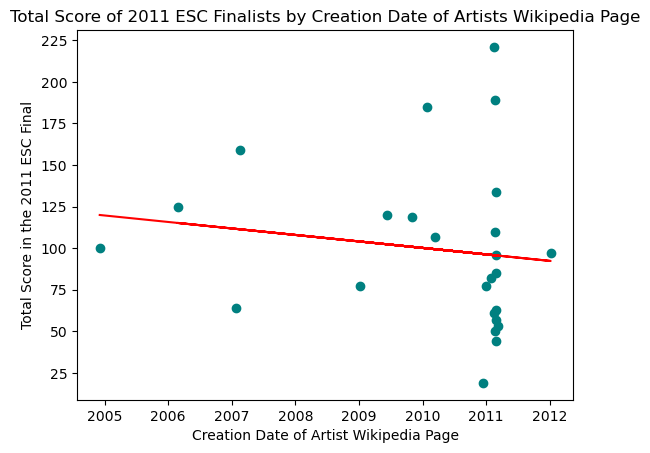

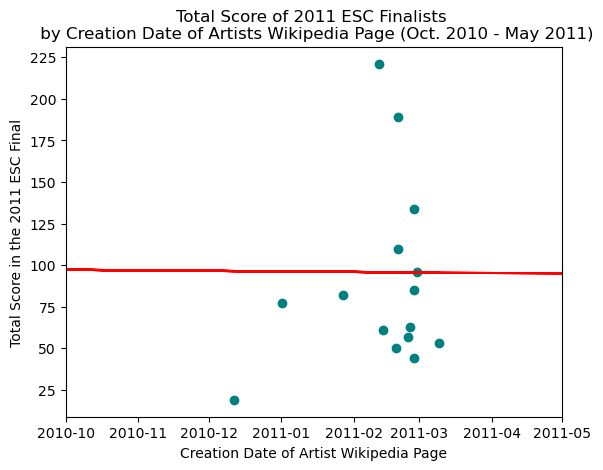

In [8]:
# Solution:
## Merging the participant data with the "Total Score" column from the 2011 finals data. Dropping NA's i.e. countries that did not get points in the final.
artists_score=pd.merge(participants["2011"], ESC_2011["Total score"], left_on="Country",right_index=True, how="left")
artists_score = artists_score.dropna(subset=["Total score"])

## Converting the timestamp variable to ordinal. Fitting the regression line using numpy as suggested in the Data Mining lecture.
artists_score["created_at_num"] = artists_score["created_at"].map(pd.Timestamp.toordinal)
IV = artists_score["created_at_num"]
DV = artists_score["Total score"]
coefficients = np.polyfit(IV, DV, 1)  
regression_line = np.poly1d(coefficients)

## Scatterplot of Creation Date of Artist Wikipedia Page ~ Total Score in the 2011 ESC Final with an added regression line
plt.figure()
plt.scatter(x=artists_score["created_at"], y=artists_score["Total score"], c="teal")
plt.plot(artists_score["created_at"], regression_line(artists_score["created_at_num"]), color="red")
plt.ylabel("Total Score in the 2011 ESC Final")
plt.xlabel("Creation Date of Artist Wikipedia Page")
plt.title("Total Score of 2011 ESC Finalists by Creation Date of Artists Wikipedia Page")
plt.show()

## Same as above but limited to the majority of Wikipedia pages created between October 2010 and May 2011
plt.figure()
plt.scatter(x=artists_score["created_at"], y=artists_score["Total score"], c="teal")
plt.plot(artists_score["created_at"], regression_line(artists_score["created_at_num"]), color="red")
plt.xlim((pd.Timestamp("2010-10"),pd.Timestamp("2011-05")))
plt.ylabel("Total Score in the 2011 ESC Final")
plt.xlabel("Creation Date of Artist Wikipedia Page")
plt.title("Total Score of 2011 ESC Finalists \n by Creation Date of Artists Wikipedia Page (Oct. 2010 - May 2011)")
plt.show()


**Answer**: 
It's difficult to make a conlusive statement about the relationship between the date of the page creation and success in the final of the 2011 ESC. Generally, most wikipedia pages were created in the same year of the contest. While artists with older wikipedia pages generally had mediocre scores, artists with more recent wikipedia pages have a wider spread between a cluster of medium-to-low scores and some high scoring outliers. If those outliers were ignored, a negative relationship between earlier success (i.e. earlier wikipedia page) and scoring at the 2011 ESC could be suggested (as indicated by the regression line).

***

<h1>Part 3 - Network Visualization</h1>


<h4>Task 4 - Vizualize the results in a network graph.</h4>

Choose one of the years you scraped above (i.e. the year, for which you also got the artist-data) and visualize the voting results in a network plot. Play around with different layouts and mappings (for example: how do you indicate contestants vs. only voters, how could you visualize the overall points a country got, how can you display the assigned points?).

*Hint:* It makes sense to restrict your plot on i.e. only the three highest points (8, 10, 12) to prevent it from becoming too cluttered.

***a) Familiarize with Graphs***

Extract i.e. the entities being mapped to the nodes and the entities being mapped to edges, etc.

In [ ]:
# Solution
## Initializing the Graph
G=nx.DiGraph()

## Adding nodes, i.e. the voting/judging countries of the ESC 2011 final.
G.add_nodes_from(ESC_2011.columns.drop("Total score"))

## Adding Score (in the final) and Color as attributes to the nodes.
## Conditioning of whether the countries/nodes are also in the contestant-list (i.e. the index of the ESC 2011 data), enables to distinguish contestants from sole judges/voters.
## Judging only countries are assigned with a final score of 1, to distinguish them from countries that received 0 points in the final.
for node, attr in G.nodes(data=True):
    if node in list(ESC_2011.index):
        attr["Score"]=ESC_2011["Total score"].loc[node]
        attr["Color"]='cornflowerblue'
    else: 
        attr["Score"]=1
        attr["Color"]='lightsalmon'
    

    
## Assigning the edges betweeen countries, presenting the voting score country i gave to country j. 
## To keep the network relatively clear, only ratings of 8 points and above are considered.
## Weights are assigned based on the inverted rating score.
for i in ESC_2011.columns.drop("Total score"):
    for j in ESC_2011.index:
        if ESC_2011[i].loc[j]>=8:
            G.add_edge(i,j, weight=1/(ESC_2011[i].loc[j]))





***b) Vizualize your choosen year***


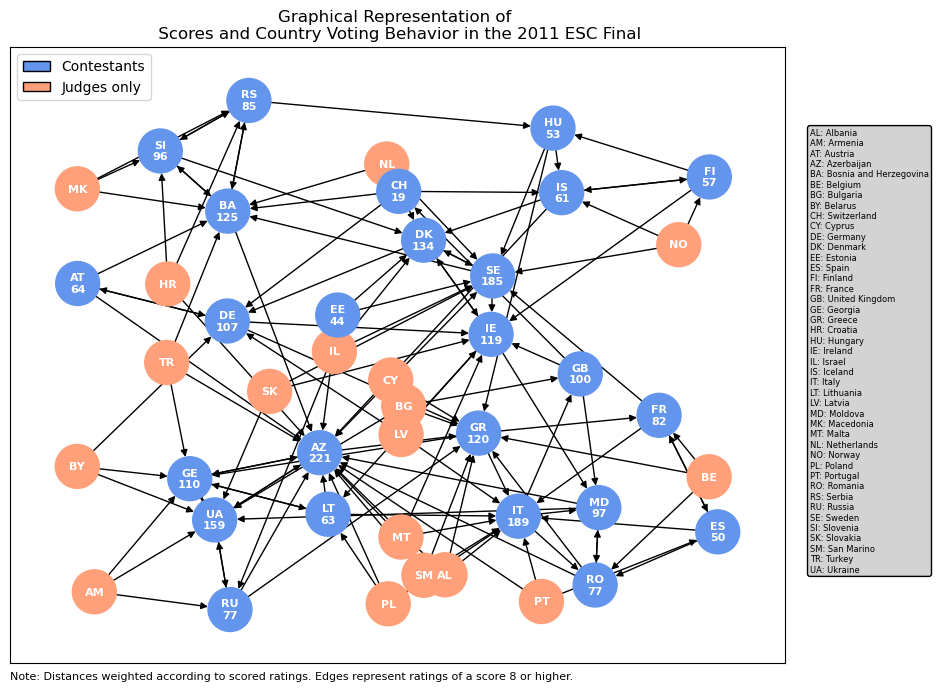

In [ ]:
# Solution
## Preparing and displaying the graph

## Labeling countries according to their UTF-code and adding a legend, respectively
def get_country_abbreviation(country_name):
    """
    A function that takes the string of a full country name, converts it to UTF-code and returns the abbrevation.
    If no proper UTF encoding for the string is found, None is returned.

    Input:
    -------
        - country_name: string
            A string of a country name
    
    Method:
    --------
        The country-string is called by the countries-function from the pycountry package that stores encoding information on that country in a pycountry-object.
        From that object the alpha2 encoding is retrieved and returned. If the countries-function was not able to assign encoding to a country, None is returned.

    Output:
    --------
        - country_code: string
            A string of the UTF country code or None
    """
    country = pc.countries.get(name=country_name)
    return country.alpha_2 if country else None

## Creating a label dictonary for the nodes that assigns a string value of Country code and score for contestants and only country code for judges/voters. 
labels={node:f"{get_country_abbreviation(node)}\n{attr["Score"]}" if attr["Score"]!=1 else get_country_abbreviation(node) for node,attr in G.nodes(data=True)}

## The lables of some countries need to be hard coded.
labels["Russia"]=f"RU\n77"
labels["Macedonia"]="MK"
labels["Moldova"]="MD\n97"
labels["Turkey"]="TR"

## Caption items are stored in a dictionary for a caption that is used to make it easier to read the node labels, i.e. assigning the country code to the country
caption_items={node:get_country_abbreviation(node) for node in G.nodes()}
caption_items["Russia"]="RU"
caption_items["Macedonia"]="MK"
caption_items["Moldova"]="MD"
caption_items["Turkey"]="TR"

## Sorting the captions into a list and joining them all together in a string that is displayable as a textbox.
caption=sorted([(i,j)for j,i in list(caption_items.items())])
caption="\n".join([": ".join(i) for i in caption])

## Using the patch-package in order to add a legend to the graph to distinguish Contestants/Judges visually.
legend_elements = [
    Patch(facecolor="cornflowerblue", edgecolor="black", label="Contestants"),
    Patch(facecolor="lightsalmon", edgecolor="black", label="Judges only")
]

## Defining the layout. I found that a weighted Kamada_Kawai layout provided the clearest visual presentation of the voting network. 
layout=nx.kamada_kawai_layout(G,weight="weight")

## The graph is plotted within a matplotlib figure. Nodes, labels and edges are added, aswell as label captions, the legend, the title and a note below the figure.
plt.figure(figsize=(10,8))
nx.draw_networkx_nodes(G, pos=layout, node_color=[attr["Color"] for node,attr in G.nodes(data=True)],node_size=1000)
nx.draw_networkx_labels(G, pos=layout, labels=labels, font_size=8, font_color="white", font_weight="bold") 
nx.draw_networkx_edges(G,pos=layout, width=1, edge_color="black", min_target_margin=16)
plt.figtext(0.925, 0.5, caption, ha='left', va='center', fontsize=6, bbox=dict(boxstyle="round", facecolor="lightgrey", edgecolor="black"))
plt.legend(handles=legend_elements, loc="upper left")
plt.title("Graphical Representation of \n Scores and Country Voting Behavior in the 2011 ESC Final")
plt.figtext(0.125,0.09, "Note: Distances weighted according to scored ratings. Edges represent ratings of a score 8 or higher.", fontsize=8)
plt.show()



***

<h1>Part 4 - Bonus</h1>


Unfortunately, the network plots for single years of the Eurovision Songcontest are not too revealing...

This might change, if we aggregate data from several years. Then, we might be able to actually detect communities of countries within the data. That's what we would like you to investigate now.

In the GitHib folder, we provided you Eurovision vote results from 10 years (2010 - 2020). 

***a) Import the data files***

Import the csv-files and aggregate the data by taking i.e. the sum or average of points a county A (in columns) assigned a country B (the rows) over the years. 



In [14]:
# Solution:
ESC_2010_2020 = pd.read_csv("data_10_years.csv")

## Macedonia changed its name to North Macedonia in 2019, so the same country is represented by two different names across the dataset
## Resolving the Macedonia-to-North-Macedonia Issue for the judges
ESC_2010_2020["North Macedonia"]=ESC_2010_2020["Macedonia"]+ESC_2010_2020["North Macedonia"]
ESC_2010_2020.drop("Macedonia", axis=1, inplace=True)

In [15]:
## I choose a similar dictionary-approach as above where each competing country is the key to a subdictonary of its summed up ratings by the other countries. 
points_per_country={}
for j in ESC_2010_2020["Contestants"].unique():
    points_per_country[j]={}
    for k in ESC_2010_2020.columns.drop(["Unnamed: 0", "Unnamed: 1", "Contestants"]):
        points=[i for i in ESC_2010_2020.loc[ESC_2010_2020["Contestants"]==j][k]]
        points_per_country[j][k]=sum(points)

##Resolving the Macedonia-to-North-Macedonia Issue for the contestants
points_per_country["North Macedonia"]={key: points_per_country["North Macedonia"][key] + points_per_country["Macedonia"][key] for key in points_per_country["North Macedonia"].keys()}
del points_per_country["Macedonia"]

In [16]:
## The dictionary of scores is again converted to a dataframe. Total, jury and televoting scores are dropped.
ESC_all=pd.DataFrame.from_dict(points_per_country, orient="index")
ESC_all.drop(["Total score","Jury score", "Televoting score"], axis=1, inplace=True)

## To get an overview of score statistics, I stored all total scores in a list. Mean, median, third quartile, and the highest 30 total scores are extracted from it.
scores=[]
for i in ESC_all.columns:
    for j in ESC_all.index:
        scores.append(ESC_all[i].loc[j])
mean_score=mean(scores)
median_score=median(scores)
q3= np.percentile(scores, 75)
max30_scores=sorted(scores, reverse=True)[:30]



***b) Visualize the result***

Visualize these aggregated scores in a network plot. The layout type `kamada_kawai_layout` is suitable for detecting communities. Make sure to weight edges by the assigned number of points.

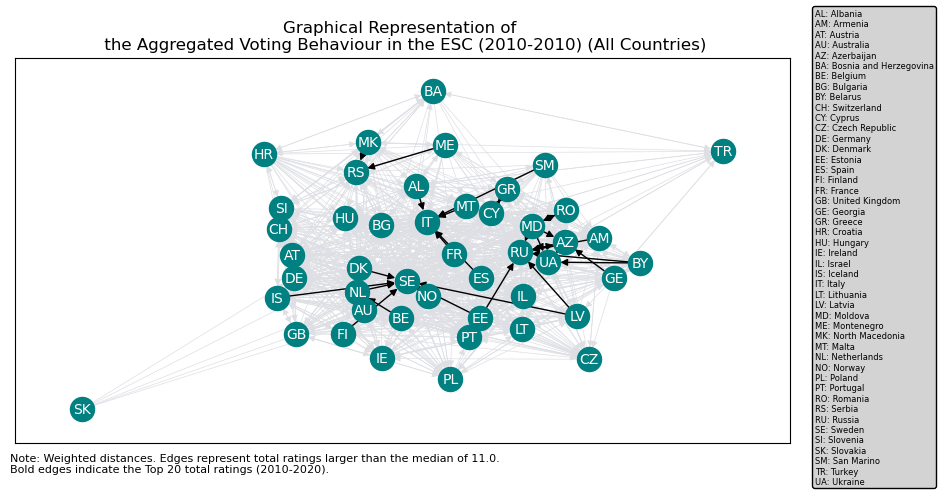

In [ ]:
#Solution: 
## Initializing a new graph H
H=nx.DiGraph()

## Adding nodes from the ESC_all column names (i.e. judging countries (contesting and not))
H.add_nodes_from(ESC_all.columns)

## Adding edges, similar to as before, the display threshold here is the median total score.
for i in ESC_all.columns:
    for j in ESC_all.index:
        if ESC_all[i].loc[j] > median_score:
            H.add_edge(i,j, weight=1/(ESC_all[i].loc[j]), score=ESC_all[i].loc[j])

## Labeling the nodes and creating a caption as before
labels_2={node:get_country_abbreviation(node)for node in H.nodes}
labels_2["Russia"]="RU"
labels_2["Moldova"]="MD"
labels_2["Turkey"]="TR"
labels_2["Czech Republic"]="CZ"
caption=sorted([(i,j)for j,i in list(labels_2.items())])
caption="\n".join([": ".join(i) for i in caption])

## This additional graph of edges will highlight the edges of the top 30 accumulated score ratings. 
H1=nx.DiGraph()
for edge in H.edges(data=True):
    if edge[2]['score'] in max30_scores:
        H1.add_edge(edge[0],edge[1], attr=edge[2])


## Creating the layout and graph
layout=nx.kamada_kawai_layout(H)
plt.figure(figsize=(10,5))
nx.draw_networkx_nodes(H, pos=layout, node_color="teal")
nx.draw_networkx_labels(H, pos=layout, labels=labels_2, font_size=10, font_color="white") 
nx.draw_networkx_edges(H, pos=layout, edge_color="#DEDFE4", width=0.5)
nx.draw_networkx_edges(H1, pos=layout, edge_color="black", width=1)
plt.title("Graphical Representation of \n the Aggregated Voting Behaviour in the ESC (2010-2010) (All Countries)")
plt.figtext(0.925, 0.5, caption, ha='left', va='center', fontsize=6, bbox=dict(boxstyle="round", facecolor="lightgrey", edgecolor="black"))
plt.figtext(0.12,0.05, f"Note: Weighted distances. Edges represent total ratings larger than the median of {median_score}.\nBold edges indicate the Top 20 total ratings (2010-2020).", fontsize=8)
plt.show()


**Interpretation**: This graph is relatively cramped due to the outliers of Slovakia and Turkey to whom few edges lead to and who assigned/received realtively few total scores all together. To get a better look at the network, I remove these outliers.

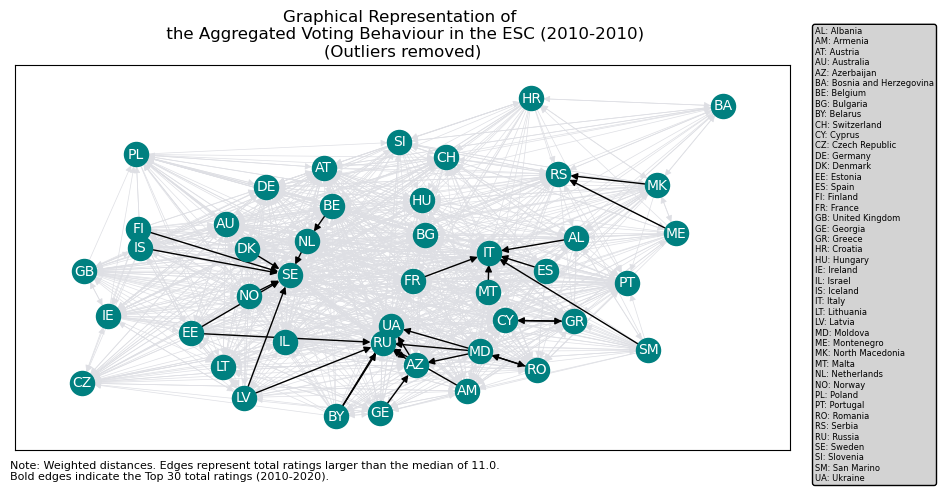

In [ ]:
# Solution:
## Basically exact same procedure as before but with the two outliers removed.

I=nx.DiGraph()
I.add_nodes_from(ESC_all.columns.drop(["Slovakia", "Turkey"]))

for i in ESC_all.columns.drop(["Slovakia", "Turkey"]):
    for j in ESC_all.index.drop("Turkey"):
        if ESC_all[i].loc[j]>=median_score:
            I.add_edge(i,j, weight=1/(ESC_all[i].loc[j]), score=ESC_all[i].loc[j])

## Labeling the nodes
labels_2={node:get_country_abbreviation(node)for node in I.nodes}
labels_2["Russia"]="RU"
labels_2["Moldova"]="MD"
labels_2["Czech Republic"]="CZ"
caption= sorted([(i,j)for j,i in list(labels_2.items())])
caption="\n".join([": ".join(i) for i in caption])

## Highlighting the Top 20 of total ratings across the years
I1=nx.DiGraph()
for edge in H.edges(data=True):
    if edge[2]['score'] in max30_scores:
        I1.add_edge(edge[0],edge[1], attr=edge[2])

layout=nx.kamada_kawai_layout(I)

plt.figure(figsize=(10,5))
nx.draw_networkx_nodes(I, pos=layout, node_color="teal")
nx.draw_networkx_labels(I, pos=layout, labels=labels_2, font_size=10, font_color="white") 
nx.draw_networkx_edges(I, pos=layout, edge_color="#DEDFE4", width=0.5)
nx.draw_networkx_edges(I1, pos=layout, edge_color="black", width=1)
plt.title("Graphical Representation of \n the Aggregated Voting Behaviour in the ESC (2010-2010)\n(Outliers removed)")
plt.figtext(0.925,0.5, caption, ha='left', va='center', fontsize=6, bbox=dict(boxstyle="round", facecolor="lightgrey", edgecolor="black"))
plt.figtext(0.12,0.05, f"Note: Weighted distances. Edges represent total ratings larger than the median of {median_score}.\nBold edges indicate the Top 30 total ratings (2010-2020).", fontsize=8)
plt.show()

***c) Interprete your findings***

The clusters and especially the highlighted edges of the top 30 total vote scores provide interesting insight on distinct voting communities:

1. The Benelux-Scandinavian community: Finland, Iceland, Denmark, Norway, Estonia, Latvia, and the Netherlands historically have given points to Sweden. Belgium also belongs to this cluster by extension as it is a consistently strong supporter of the Netherlands.

2. The Eastern community: Moldavia, Ukraine, Romania, Armenia, Azerbaijan, Latvia, Belarus, Estonia, Georgia, and Israel build a strong voting community with Russia in its center.

3. The Mediterranean community: France, Malta, Spain, San Marino, and Albania traditionally vote for Italy. Cyprus and Greece seem to have a strong voting connection, too.

4. The Balkan community: Two strong edges lead from North Macedonia and Montenegro to Serbia, indicating some Balkan clustering.